In [2]:
import pandas as pd
import numpy as np
import os
import sys
from fbprophet import Prophet
import itertools
import warnings
import cufflinks as cf

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
path=os.path.join(os.path.dirname(os.getcwd()),"code/Wrangled_CSVs")
print(path)
eu=[]
for item in os.listdir(path):
    if item.startswith('fbp'):
        fn=os.path.join(path,item)
        df=pd.read_csv(fn)
        print(fn)
        eu.append(df)

confirmed,recovered,deaths=eu[0],eu[1],eu[2]

/home/Github/COVID-19_Interactive/code/Wrangled_CSVs
/home/Github/COVID-19_Interactive/code/Wrangled_CSVs/fbp_eu_recovered.csv
/home/Github/COVID-19_Interactive/code/Wrangled_CSVs/fbp_eu_deaths.csv
/home/Github/COVID-19_Interactive/code/Wrangled_CSVs/fbp_eu_confirmed.csv


In [17]:
def profet_modeling(df):
    m = Prophet(interval_width=0.95,daily_seasonality=False,yearly_seasonality=False)
    m.fit(df)
    
    future_dates = m.make_future_dataframe(periods=45)
    
    forecast = m.predict(future_dates)
    
    head=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
    tail=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    
    
    print(head,"\n\n",tail)
    
    fig = m.plot(forecast)

          ds         yhat   yhat_lower   yhat_upper
0 2020-01-22 -1915.907327 -6055.664700  2039.414830
1 2020-01-23 -1845.091086 -5723.713108  2487.796905
2 2020-01-24 -1725.963223 -6058.705907  2515.674459
3 2020-01-25 -1334.967900 -5417.068612  2991.895678
4 2020-01-26  -863.005435 -5068.513463  2831.408084 

             ds         yhat   yhat_lower    yhat_upper
102 2020-05-03  8654.422051  4744.235783  12869.868195
103 2020-05-04  8725.191890  4575.179196  12908.095144
104 2020-05-05  7808.324979  3970.283032  11669.708317
105 2020-05-06  8278.836782  4270.029042  12182.560495
106 2020-05-07  8351.126790  4346.898879  12640.400460


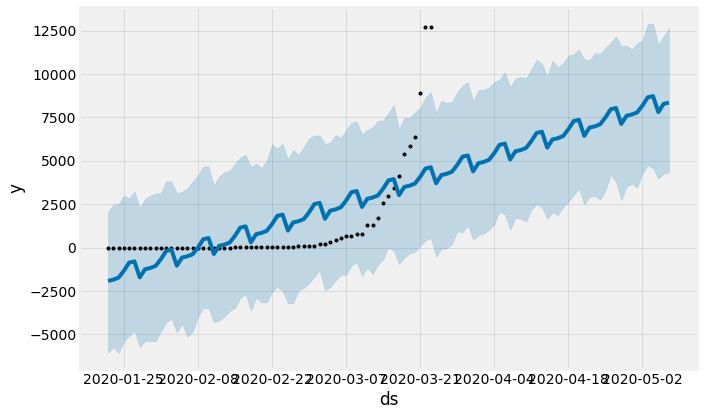

In [18]:
profet_modeling(df=confirmed)

          ds         yhat   yhat_lower   yhat_upper
0 2020-01-22 -1460.663911 -4193.833545  1607.028824
1 2020-01-23 -1366.361668 -4297.191330  1521.731322
2 2020-01-24 -1169.515195 -3910.831902  1654.281576
3 2020-01-25  -981.558463 -4040.049423  2093.999735
4 2020-01-26  -769.725851 -3575.534288  2273.506282 

             ds         yhat   yhat_lower   yhat_upper
102 2020-05-03  6324.412162  3146.964021  9360.833322
103 2020-05-04  6392.184390  3484.864393  9449.079298
104 2020-05-05  5846.517584  2826.266420  8749.835447
105 2020-05-06  6139.165733  3184.486849  9105.864265
106 2020-05-07  6234.084082  3250.959576  9245.711516


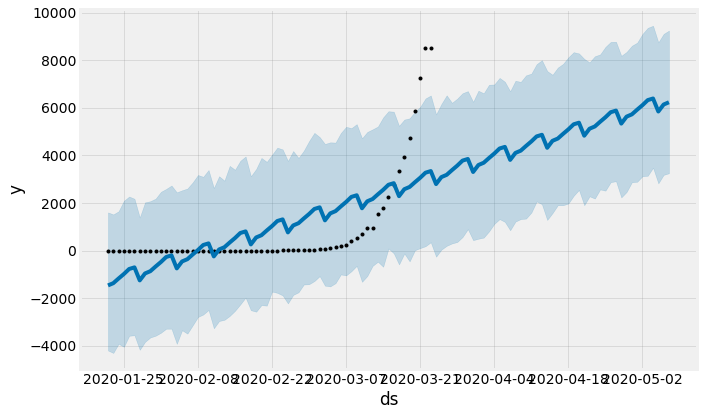

In [19]:
profet_modeling(df=recovered)

          ds          yhat    yhat_lower    yhat_upper
0 2020-01-22 -30091.491965 -92793.154723  26366.552023
1 2020-01-23 -27809.974562 -84627.174772  29697.206775
2 2020-01-24 -23936.360820 -83603.736301  30703.121058
3 2020-01-25 -20531.385060 -80351.814127  37154.192728
4 2020-01-26 -17270.698227 -77787.456186  39388.727968 

             ds           yhat    yhat_lower     yhat_upper
102 2020-05-03  133755.128140  77034.838128  187010.036335
103 2020-05-04  135267.393990  73965.868030  195612.285529
104 2020-05-05  125543.349946  72094.327162  184285.625718
105 2020-05-06  131693.090794  75509.486350  193242.242918
106 2020-05-07  133991.108497  83424.439433  193900.358462


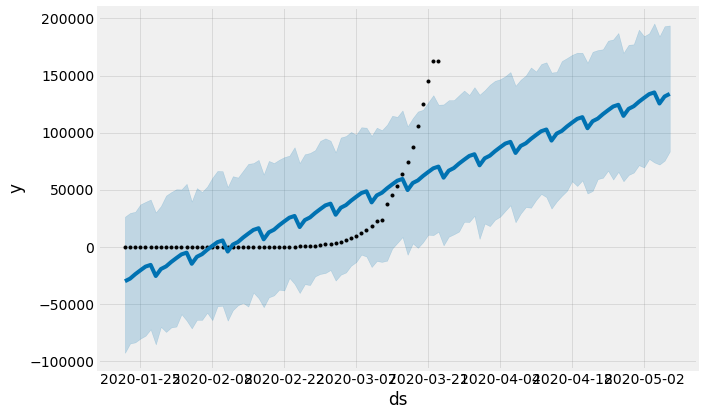

In [20]:
profet_modeling(df=deaths)